<a href="https://colab.research.google.com/github/akshaypat444/pytorch_experiments/blob/main/make_more_char_level_model_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MakeMore Character Level Modeling

In [1]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2024-07-27 02:41:21--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2024-07-27 02:41:21 (6.23 MB/s) - ‘names.txt’ saved [228145/228145]



In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

# Bigram Language Model

In [5]:
b = {}

for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [6]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [7]:
import torch

In [8]:
a = torch.zeros((3,5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [9]:
a.dtype

torch.int32

In [10]:
a[1, 3] = 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [11]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [12]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [13]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

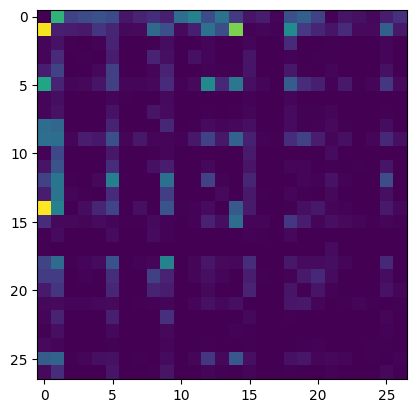

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [15]:
N.shape

torch.Size([27, 27])

In [16]:
N[0, :]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [17]:
p = N[0].float()
p

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [18]:
# Normalize
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [19]:
itos = {i:s for s,i in stoi.items()}

In [20]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [21]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [22]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [23]:
P = N.float()
P = P / P.sum(1, keepdim=True)

In [24]:
P.shape

torch.Size([27, 27])

In [25]:
torch.multinomial(P[0], num_samples=1, replacement=True, generator=g).item()

26

In [26]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  ix = 0
  while True:

    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break

  print(''.join(out))

junide.
janasah.
p.
cony.
a.


# Gradient Based Learning

In [27]:
import torch.nn.functional as F

xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]

    xs.append(ix1)
    ys.append(ix2)

# Input Dataset
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f"Number of examples {num}")

# Initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

Number of examples 228146


In [28]:
# Gradient Descent

epochs = 100
learning_rate = -50.0

for i in range(epochs):
  # Forward Pass
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = (xenc @ W)
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdims=True)
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01 *(W**2).mean()

  # Backward pass
  W.grad = None # Set gradient to 0
  loss.backward()

  # Update the weights
  W.data += learning_rate * W.grad
  print(f"Epoch: {i}, loss: {loss}")


Epoch: 0, loss: 3.7686190605163574
Epoch: 1, loss: 3.3788065910339355
Epoch: 2, loss: 3.16109037399292
Epoch: 3, loss: 3.0271859169006348
Epoch: 4, loss: 2.9344842433929443
Epoch: 5, loss: 2.867231607437134
Epoch: 6, loss: 2.8166542053222656
Epoch: 7, loss: 2.777146339416504
Epoch: 8, loss: 2.7452542781829834
Epoch: 9, loss: 2.7188303470611572
Epoch: 10, loss: 2.696505546569824
Epoch: 11, loss: 2.6773719787597656
Epoch: 12, loss: 2.6608052253723145
Epoch: 13, loss: 2.6463515758514404
Epoch: 14, loss: 2.633664846420288
Epoch: 15, loss: 2.622471570968628
Epoch: 16, loss: 2.6125476360321045
Epoch: 17, loss: 2.6037068367004395
Epoch: 18, loss: 2.595794916152954
Epoch: 19, loss: 2.5886809825897217
Epoch: 20, loss: 2.5822560787200928
Epoch: 21, loss: 2.5764293670654297
Epoch: 22, loss: 2.5711236000061035
Epoch: 23, loss: 2.5662729740142822
Epoch: 24, loss: 2.5618228912353516
Epoch: 25, loss: 2.5577263832092285
Epoch: 26, loss: 2.5539441108703613
Epoch: 27, loss: 2.550442695617676
Epoch: 28, 

In [31]:
# Sample from NN model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  ix = 0

  while True:

    # Before
    # p = P[ix]

    # Now
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = (xenc @ W)
    counts = logits.exp()
    p = counts / counts.sum(1, keepdims=True)

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cfay.
a.


# MultiLayer Perceptron

In [42]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [92]:
# Build Dataset
block_size = 3
X, Y = [], []

for w in words[:5]:
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [49]:
# Inputs, Labels
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [50]:
# embedding matrix for 27 examples
C = torch.randn((27, 2))
C

tensor([[-1.9770, -1.2114],
        [-0.2527, -1.6000],
        [-0.8823, -0.3820],
        [-0.6264, -0.5549],
        [ 1.9110, -0.1245],
        [-0.4520, -0.2053],
        [-0.6497, -1.2969],
        [-0.5585, -0.8838],
        [-0.0335, -0.1576],
        [-2.0687, -0.6541],
        [ 1.9693,  1.6038],
        [ 1.3450,  0.4984],
        [-0.8564,  0.4079],
        [ 1.7739,  0.9115],
        [ 2.2901, -1.2010],
        [-2.7432,  1.1449],
        [ 0.4772, -0.5189],
        [ 1.3965, -1.9389],
        [-0.8429, -0.7955],
        [ 1.2706, -1.3472],
        [ 1.1564,  0.3377],
        [-0.5448, -0.2032],
        [-0.2441, -0.5619],
        [-1.2524,  1.9449],
        [ 0.5821,  0.4013],
        [-0.2787,  0.2677],
        [ 0.9445, -0.4787]])

In [51]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.4520, -0.2053])

In [52]:
C[5]

tensor([-0.4520, -0.2053])

In [55]:
embeddings = C[X]

In [57]:
embeddings @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [64]:
# 32 examples with 6 inputs
torch.cat([embeddings[:, 0, :], embeddings[:, 1, :], embeddings[:, 2, :]], 1)

tensor([[-1.9770, -1.2114, -1.9770, -1.2114, -1.9770, -1.2114],
        [-1.9770, -1.2114, -1.9770, -1.2114, -0.4520, -0.2053],
        [-1.9770, -1.2114, -0.4520, -0.2053,  1.7739,  0.9115],
        [-0.4520, -0.2053,  1.7739,  0.9115,  1.7739,  0.9115],
        [ 1.7739,  0.9115,  1.7739,  0.9115, -0.2527, -1.6000],
        [-1.9770, -1.2114, -1.9770, -1.2114, -1.9770, -1.2114],
        [-1.9770, -1.2114, -1.9770, -1.2114, -2.7432,  1.1449],
        [-1.9770, -1.2114, -2.7432,  1.1449, -0.8564,  0.4079],
        [-2.7432,  1.1449, -0.8564,  0.4079, -2.0687, -0.6541],
        [-0.8564,  0.4079, -2.0687, -0.6541, -0.2441, -0.5619],
        [-2.0687, -0.6541, -0.2441, -0.5619, -2.0687, -0.6541],
        [-0.2441, -0.5619, -2.0687, -0.6541, -0.2527, -1.6000],
        [-1.9770, -1.2114, -1.9770, -1.2114, -1.9770, -1.2114],
        [-1.9770, -1.2114, -1.9770, -1.2114, -0.2527, -1.6000],
        [-1.9770, -1.2114, -0.2527, -1.6000, -0.2441, -0.5619],
        [-0.2527, -1.6000, -0.2441, -0.5

In [66]:
torch.cat(torch.unbind(embeddings, 1), 1)

tensor([[-1.9770, -1.2114, -1.9770, -1.2114, -1.9770, -1.2114],
        [-1.9770, -1.2114, -1.9770, -1.2114, -0.4520, -0.2053],
        [-1.9770, -1.2114, -0.4520, -0.2053,  1.7739,  0.9115],
        [-0.4520, -0.2053,  1.7739,  0.9115,  1.7739,  0.9115],
        [ 1.7739,  0.9115,  1.7739,  0.9115, -0.2527, -1.6000],
        [-1.9770, -1.2114, -1.9770, -1.2114, -1.9770, -1.2114],
        [-1.9770, -1.2114, -1.9770, -1.2114, -2.7432,  1.1449],
        [-1.9770, -1.2114, -2.7432,  1.1449, -0.8564,  0.4079],
        [-2.7432,  1.1449, -0.8564,  0.4079, -2.0687, -0.6541],
        [-0.8564,  0.4079, -2.0687, -0.6541, -0.2441, -0.5619],
        [-2.0687, -0.6541, -0.2441, -0.5619, -2.0687, -0.6541],
        [-0.2441, -0.5619, -2.0687, -0.6541, -0.2527, -1.6000],
        [-1.9770, -1.2114, -1.9770, -1.2114, -1.9770, -1.2114],
        [-1.9770, -1.2114, -1.9770, -1.2114, -0.2527, -1.6000],
        [-1.9770, -1.2114, -0.2527, -1.6000, -0.2441, -0.5619],
        [-0.2527, -1.6000, -0.2441, -0.5

In [68]:
embeddings.view(32, 6)

tensor([[-1.9770, -1.2114, -1.9770, -1.2114, -1.9770, -1.2114],
        [-1.9770, -1.2114, -1.9770, -1.2114, -0.4520, -0.2053],
        [-1.9770, -1.2114, -0.4520, -0.2053,  1.7739,  0.9115],
        [-0.4520, -0.2053,  1.7739,  0.9115,  1.7739,  0.9115],
        [ 1.7739,  0.9115,  1.7739,  0.9115, -0.2527, -1.6000],
        [-1.9770, -1.2114, -1.9770, -1.2114, -1.9770, -1.2114],
        [-1.9770, -1.2114, -1.9770, -1.2114, -2.7432,  1.1449],
        [-1.9770, -1.2114, -2.7432,  1.1449, -0.8564,  0.4079],
        [-2.7432,  1.1449, -0.8564,  0.4079, -2.0687, -0.6541],
        [-0.8564,  0.4079, -2.0687, -0.6541, -0.2441, -0.5619],
        [-2.0687, -0.6541, -0.2441, -0.5619, -2.0687, -0.6541],
        [-0.2441, -0.5619, -2.0687, -0.6541, -0.2527, -1.6000],
        [-1.9770, -1.2114, -1.9770, -1.2114, -1.9770, -1.2114],
        [-1.9770, -1.2114, -1.9770, -1.2114, -0.2527, -1.6000],
        [-1.9770, -1.2114, -0.2527, -1.6000, -0.2441, -0.5619],
        [-0.2527, -1.6000, -0.2441, -0.5

In [104]:
# Build Dataset
block_size = 3
X, Y = [], []

for w in words:
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)


# Initialization
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

num_parameters = sum(p.nelement() for p in parameters)
print(num_parameters)
for p in parameters:
  p.requires_grad = True


3481


In [105]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [106]:
lri = []
lossi = []


for i in range(1000):

  ix = torch.randint(0, X.shape[0], (32,))

  # Forward Pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  # counts = logits.exp()
  # prob = counts / counts.sum(1, keepdims=True)
  # loss = -prob[torch.arange(32), Y].log().mean()
  loss = F.cross_entropy(logits, Y[ix])

  # Backward Pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad

  lri.append(lr)
  lossi.append(loss.item())

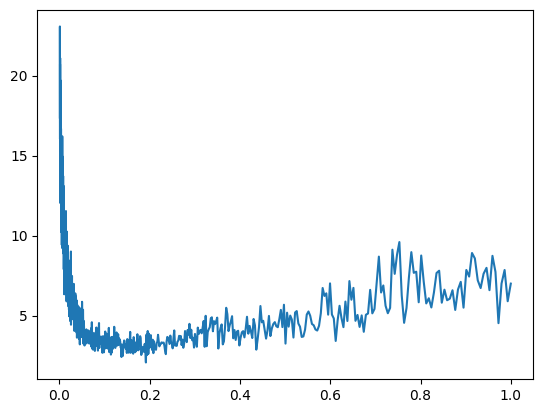

In [107]:
plt.plot(lri, lossi)